In [ ]:
# GDrive mount (required only if being run on GDrive)
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# importing dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
from tensorflow.keras.utils import to_categorical
import keras


In [ ]:
##### PLEASE SET THESE CAREFULLY refer :instructions.txt

INPUT_DIR = "/gdrive/Shareddrives/DLNN_ProjC1/output/new_data_sampling"
OUTPUT_DIR = "/gdrive/Shareddrives/DLNN_ProjC1/output/final_c2_models2"
#####

# some constants
WINDOW_SIZE = 160
NUMBER_MODELS = 21

In [ ]:
# some utility functions 

def normalize_z(x, avg, std_dev, smooth = 0.0001):
  return (x-avg) / (std_dev + smooth)

def normalize_mm(x, minn, maxx, smooth = 0.0001):
  return 2*(x-(minn+maxx)/2) / (maxx - minn + smooth)


def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))

        val = int(val / 1000)
        return '{p:.2f}%  ({v:d}K)'.format(p=pct,v=val)
    return my_autopct

# Defining a function for plotting training and validation learning curves
def plot_history(history):
	  # plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
    # plot accuracy
    plt.title('Accuracy')
    plt.plot(history.history['categorical_accuracy'], color='blue', label='train')
    plt.plot(history.history['val_categorical_accuracy'], color='red', label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

def distribution_pie(dataset, title):
  aug_0 = np.where(dataset==0)[0].shape[0]
  aug_1 = np.where(dataset==1)[0].shape[0]
  aug_2 = np.where(dataset==2)[0].shape[0]
  aug_3 = np.where(dataset==3)[0].shape[0]

  print(aug_0, aug_1, aug_2, aug_3)
  plt.figure(figsize=(6, 6))
  plt.title(title)
  plt.pie([aug_0, aug_1, aug_2, aug_3], labels = ["zero", "one", "two", "three"],
          labeldistance= True, autopct=make_autopct([aug_0, aug_1, aug_2, aug_3]), explode = (0.1, 0.1, 0.1, 0.1))
  plt.legend()

  plt.show()

1899502 1309292 1368570 2012716


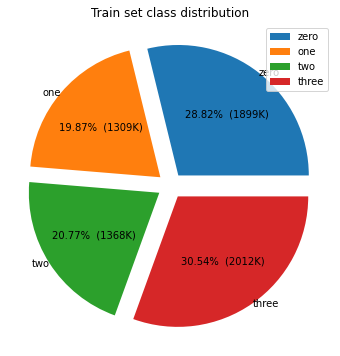

809980 568332 585822 860186


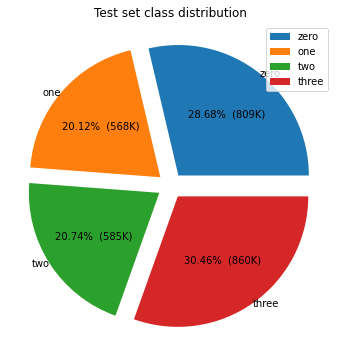

In [ ]:
# load data
from sklearn.model_selection import  train_test_split


dataset = np.load(os.path.join(INPUT_DIR, "dataset.npy"))
x, y = dataset[..., :6], dataset[..., -1].astype(np.uint8)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=33)


mean = np.load(os.path.join(INPUT_DIR, "x_mean.npy"))
std = np.load(os.path.join(INPUT_DIR, "x_stddev.npy"))


x_train = normalize_z(x_train, mean, std)
x_test = normalize_z(x_test, mean, std)

distribution_pie(y_train, "Train set class distribution")
distribution_pie(y_test, "Test set class distribution")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

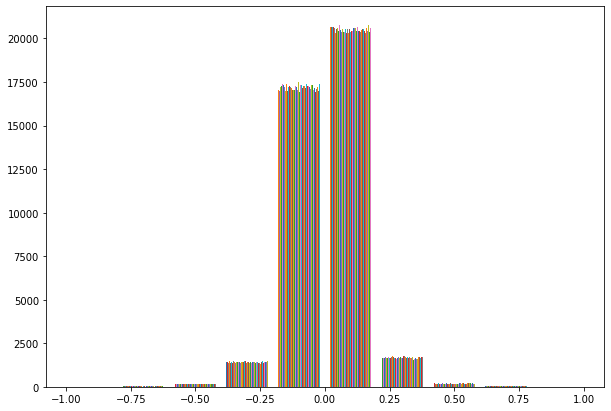

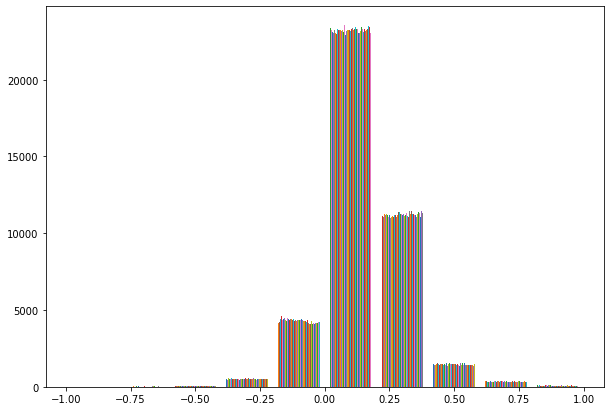

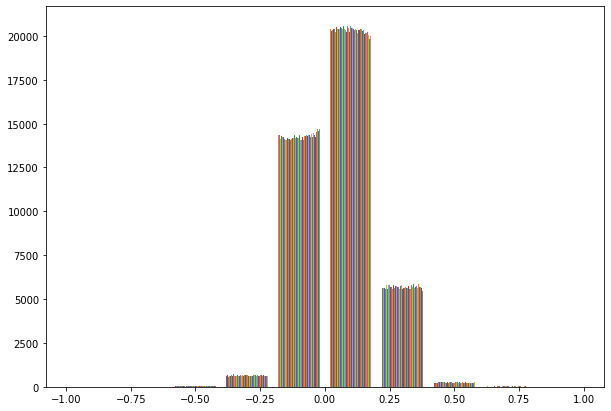

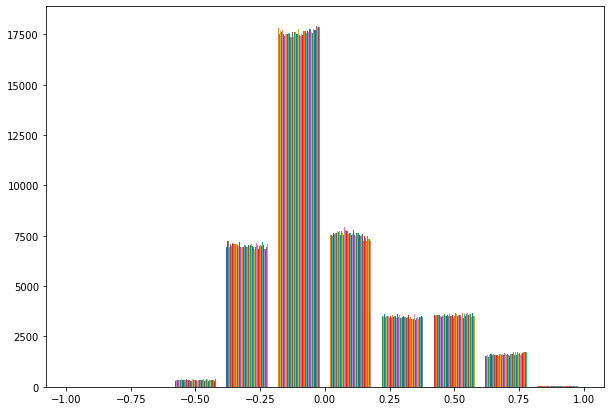

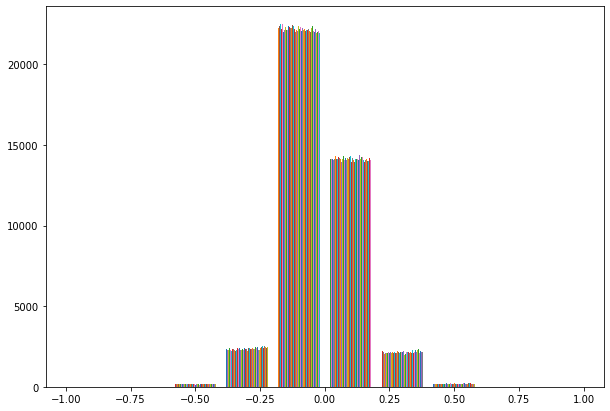

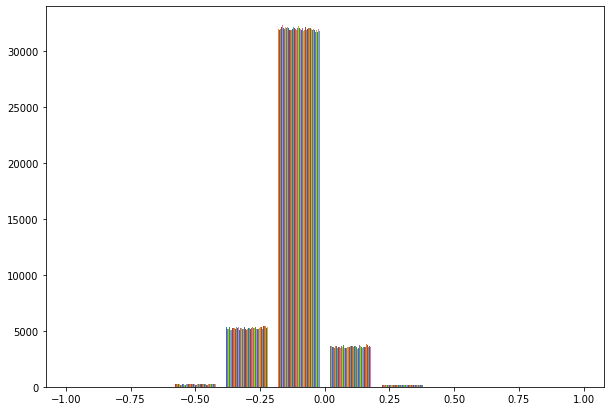

In [ ]:
# seeing how the data looks
plt.figure(figsize=(10, 7))
plt.hist(x_train[:, :, 0])
plt.show()
plt.figure(figsize=(10, 7))
plt.hist(x_train[:, :, 1])
plt.show()
plt.figure(figsize=(10, 7))
plt.hist(x_train[:, :, 2])
plt.show()
plt.figure(figsize=(10, 7))
plt.hist(x_train[:, :, 3])
plt.show()
plt.figure(figsize=(10, 7))
plt.hist(x_train[:, :, 4])
plt.show()
plt.figure(figsize=(10, 7))
plt.hist(x_train[:, :, 5])
plt.show()


In [ ]:
# importing stuff required to build the model
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Conv1D, Dropout, BatchNormalization, MaxPooling1D, UpSampling1D


In [ ]:
#dropout before batch-norm: https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout

def make_model(input_shape, num_classes):
    input_dropout_rate = 0.1
    dropout_rate = 0.25
    input_layer = Input(input_shape)

    conv1 = Conv1D(filters=16, kernel_size=3, padding="same", activation = "relu")(input_layer)
    conv1 = Dropout(input_dropout_rate)(conv1)
    # conv1 = Conv1D(filters=16, kernel_size=3, padding="same", activation = "relu")(conv1)
    # conv1 = Dropout(input_dropout_rate)(conv1)
    # conv1 = BatchNormalization()(conv1)
    conv1 = MaxPooling1D(pool_size =2)(conv1)

    conv2 = Conv1D(filters=32, kernel_size=3, padding="same", activation = "relu")(conv1)
    conv2 = Dropout(dropout_rate)(conv2)
    # conv2 = Conv1D(filters=32, kernel_size=3, padding="same", activation = "relu")(conv2)
    # conv2 = Dropout(dropout_rate)(conv2)
    
    # conv2 = BatchNormalization()(conv2)
    conv2 = MaxPooling1D(pool_size =2)(conv2)

    conv3 = Conv1D(filters=64, kernel_size=3, padding="same", activation = "relu")(conv2)
    conv3 = Dropout(dropout_rate)(conv3)
    # conv3 = Conv1D(filters=64, kernel_size=3, padding="same", activation = "relu")(conv3)
    # conv3 = Dropout(dropout_rate)(conv3)


    # conv3 = BatchNormalization()(conv3)
    conv3 = MaxPooling1D(pool_size =2)(conv3)


    # conv4 = Conv1D(filters=200, kernel_size=3, padding="same", activation = "relu")(conv3)
    # conv4 = Dropout(dropout_rate)(conv4)
    # # conv4 = BatchNormalization()(conv4)
    # conv4 = MaxPooling1D(pool_size =2)(conv4)

    # deconv4 = Conv1D(filters=200, kernel_size=3, padding = "same", activation="relu")(conv4)
    # deconv4 = Dropout(dropout_rate)(deconv4)
    # # deconv4 = BatchNormalization()(deconv4)
    # deconv4 = UpSampling1D(size =2)(deconv4)

    deconv3 = Conv1D(filters=64, kernel_size=3, padding = "same", activation="relu")(conv3)
    deconv3 = Dropout(dropout_rate)(deconv3)
    # deconv3 = Conv1D(filters=64, kernel_size=3, padding = "same", activation="relu")(deconv3)
    # deconv3 = Dropout(dropout_rate)(deconv3)
    
    # deconv3 = BatchNormalization()(deconv3)
    deconv3 = UpSampling1D(size =2)(deconv3)

    deconv2 = Conv1D(filters=32, kernel_size=3, padding = "same", activation="relu")(deconv3)
    deconv2 = Dropout(dropout_rate)(deconv2)
    # deconv2 = Conv1D(filters=32, kernel_size=3, padding = "same", activation="relu")(deconv2)
    # deconv2 = Dropout(dropout_rate)(deconv2)
    
    # deconv2 = BatchNormalization()(deconv2)
    deconv2 = UpSampling1D(size =2)(deconv2)

    deconv1 = Conv1D(filters=16, kernel_size=3, padding = "same", activation="relu")(deconv2)
    deconv1 = Dropout(dropout_rate)(deconv1)
    # deconv1 = Conv1D(filters=16, kernel_size=3, padding = "same", activation="relu")(deconv1)
    # deconv1 = Dropout(dropout_rate)(deconv1)

    # deconv1 = BatchNormalization()(deconv1)
    deconv1 = UpSampling1D(size =2)(deconv1)

    output_layer = Conv1D(filters = 4, kernel_size = 3, padding = "same", activation="softmax")(deconv1)
    
    return Model(inputs=input_layer, outputs=output_layer)


In [ ]:
import tensorflow as tf

# custom weighted loss function (weighted categorical cross entropy)
def weighted_crossentropy(y_true, y_pred):
  EPSILON = 0.0001

  y_t = tf.math.multiply(tf.broadcast_to(tf.constant([2, 1, 1, 2], dtype = float), tf.shape(y_true)) , y_true)
  h_t = tf.math.multiply(tf.broadcast_to(tf.constant([1, 1, 1, 1], dtype = float), tf.shape(y_pred)) , y_pred)

  return tf.math.reduce_mean(- tf.math.multiply(y_t  , tf.math.log(tf.add(h_t, EPSILON))))
  



In [ ]:
# common training hyper-parameters

epochs = 200
batch_size = 1024

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1, restore_best_weights=False),
    # keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, min_lr=0.00001, verbose=1)
]

iteration: 0 	data: (16475, 160, 6) (16475, 160, 4)
552/552 [==============================] - 2s 4ms/step - loss: 0.0863 - categorical_accuracy: 0.9259


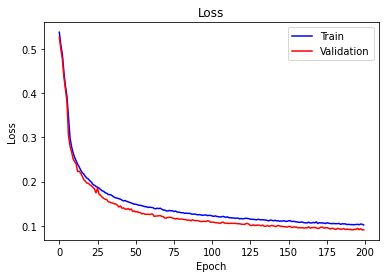

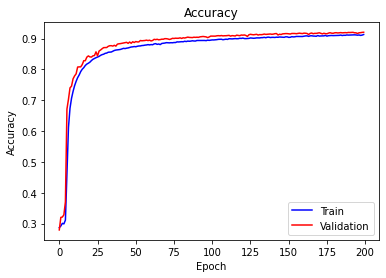

[[713829  16032  10535  69584]
 [ 28403 539163    123    643]
 [ 28789    566 555799    668]
 [ 51392   2536    125 806133]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87    809980
           1       0.97      0.95      0.96    568332
           2       0.98      0.95      0.96    585822
           3       0.92      0.94      0.93    860186

    accuracy                           0.93   2824320
   macro avg       0.93      0.93      0.93   2824320
weighted avg       0.93      0.93      0.93   2824320

iteration: 1 	data: (16475, 160, 6) (16475, 160, 4)
552/552 [==============================] - 2s 4ms/step - loss: 0.0826 - categorical_accuracy: 0.9285


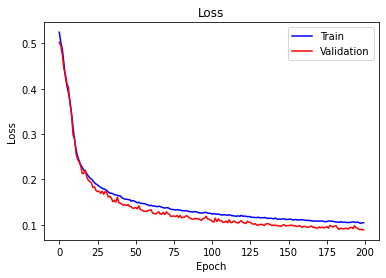

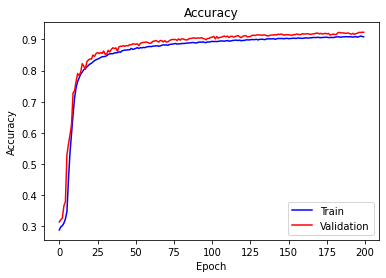

[[734067  15018  10858  50037]
 [ 29656 538030    250    396]
 [ 26676    208 558412    526]
 [ 66502   1538    163 791983]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88    809980
           1       0.97      0.95      0.96    568332
           2       0.98      0.95      0.97    585822
           3       0.94      0.92      0.93    860186

    accuracy                           0.93   2824320
   macro avg       0.94      0.93      0.93   2824320
weighted avg       0.93      0.93      0.93   2824320

iteration: 2 	data: (16475, 160, 6) (16475, 160, 4)


In [ ]:
#training models

from sklearn.metrics import  confusion_matrix, classification_report

for model_number in range(NUMBER_MODELS):
  temp_x, _, temp_y, _ = train_test_split(x_train, y_train, train_size = 0.4, random_state = model_number)
  
  print("iteration:", model_number, "\tdata:", temp_x.shape, temp_y.shape)

  temp_model = make_model(input_shape=[WINDOW_SIZE, 6], num_classes=4)

  temp_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=weighted_crossentropy,
    metrics=["categorical_accuracy"],
    
  )

  temp_history = temp_model.fit(
    temp_x,
    temp_y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split = 0.2,
    verbose=0,
    shuffle = True
  )

  temp_model.evaluate(temp_x, temp_y)
  temp_model.evaluate(x_test, y_test)

  plot_history(temp_history)

  y_test_pred = temp_model.predict(x_test)
  y_test_pred_sparse = np.argmax(y_test_pred, axis = -1).reshape(-1)
  y_test_sparse = np.argmax(y_test, axis = -1).reshape(-1)


  print(confusion_matrix(y_test_sparse, y_test_pred_sparse))
  print(classification_report(y_test_sparse, y_test_pred_sparse))
  
  temp_model.save(os.path.join(OUTPUT_DIR, "model_"+str(model_number)+".h5"))

